
<div class="alert alert-block alert-info"><font size="5"><center><b><u> Sprint 13. Aprenentatge Supervisat - Classificació
\begin{align*}Marc\:Breysse\end{align*}

<span style=color:blue>L'objectiu és familiaritzar-nos amb els algoritmes d'aprenentage no supervisats de Classificació</span>

<span style=color:blue>*Arbres de classificació*</span>

<span style=color:blue>*KNN - k-Nearest Neighbors*</span>

<span style=color:blue>*Regressió Logística*</span>

<span style=color:blue>*Support Vector Machine*</span>

<span style=color:blue>*XGboost*</span>

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).</span>

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split # Import train_test_split function

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset saved in Sprint11
DF = pd.read_csv('DelayedFlightsCleaned.csv')
DF.shape

(1928371, 14)

In [3]:
DF.nunique()

Unnamed: 0           1928371
DayOfWeek                  7
CRSDepTime              1193
CRSArrTime              1361
ActualElapsedTime        673
CRSElapsedTime           500
ArrDelay                1128
DepDelay                1053
TaxiIn                   180
TaxiOut                  332
UniqueCarrier             20
Origin                   303
Dest                     302
Date                     366
dtype: int64

In [4]:
# to reduce cumputation time, we will reduce dataset to 100.000 samples
DF = DF.sample(n=100000, random_state=1)
DF.shape

(100000, 14)

In [5]:
DF.nunique()

Unnamed: 0           100000
DayOfWeek                 7
CRSDepTime             1118
CRSArrTime             1283
ActualElapsedTime       512
CRSElapsedTime          454
ArrDelay                583
DepDelay                529
TaxiIn                   99
TaxiOut                 197
UniqueCarrier            20
Origin                  293
Dest                    296
Date                    366
dtype: int64

<span style=color:green>*With downsizing dataset to 100.000 rows, numbers of 'Origin' airports is reduced from 303 to 293*</span>

In [6]:
DF.columns

Index(['Unnamed: 0', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'Origin', 'Dest', 'Date'],
      dtype='object')

<span style=color:green>In fisrt place, We will predict the Arrival Delay based numerical variables 'CRS Departure Time', 'CRS Arrival Time', 'Departure Delay','DayOfWeek' and categorical variables 'Uniquecarrier' and 'Departure Airport'.*</span>

In [7]:
# In this sprint, we will predict Arrival Delay based numerical variables 'CRS Departure Time', 'CRS Arrival Time', 'Departure Delay','DayOfWeek' and categorical variables 'Uniquecarrier' and 'Departure Airport'.
DF.drop(['Date','Unnamed: 0','CRSElapsedTime','ActualElapsedTime','TaxiIn',
       'TaxiOut','Dest'], axis='columns', inplace=True)

In [8]:
DF.columns

Index(['DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'ArrDelay', 'DepDelay',
       'UniqueCarrier', 'Origin'],
      dtype='object')

In [9]:
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,UniqueCarrier,Origin
942808,6,642,734,43.0,39.0,OO,TUS
1484347,1,1115,1185,1.0,9.0,MQ,MAF
1566787,6,975,1037,-1.0,9.0,US,CLT
1256237,2,1040,1160,57.0,28.0,DL,ATL
651063,5,1000,1037,8.0,13.0,EV,CVG


<span style=color:green>New variable according to flight delay occurence  (ArrDelay > 0)</span>

In [10]:
DF['LateArr'] = np.where(DF['ArrDelay'] > 0, '1', '0')
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,UniqueCarrier,Origin,LateArr
942808,6,642,734,43.0,39.0,OO,TUS,1
1484347,1,1115,1185,1.0,9.0,MQ,MAF,1
1566787,6,975,1037,-1.0,9.0,US,CLT,0
1256237,2,1040,1160,57.0,28.0,DL,ATL,1
651063,5,1000,1037,8.0,13.0,EV,CVG,1


<span style=color:green>Encoding categorical variables 'UniqueCarrier', 'Origin', 'Dest'</span>

In [11]:
#X_train - Encoding categorical variables 'UniqueCarrier', 'Origin'

# Create dummy variables
dummy_UniqueCarrier_type = pd.get_dummies(DF['UniqueCarrier'], prefix='UniqueCarrier', drop_first=True)
dummy_Origin_type = pd.get_dummies(DF['Origin'], prefix='Origin', drop_first=True)

# Drop unnecessary columns
to_drop = ['UniqueCarrier','Origin']
DF.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
DF = pd.concat([DF, dummy_UniqueCarrier_type, dummy_Origin_type], axis=1)
DF.shape

(100000, 317)

In [12]:
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,LateArr,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,...,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM
942808,6,642,734,43.0,39.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484347,1,1115,1185,1.0,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1566787,6,975,1037,-1.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256237,2,1040,1160,57.0,28.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651063,5,1000,1037,8.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style=color:green>Feature Selection</span>

In [13]:
X, y = DF.drop(['LateArr','ArrDelay'],axis=1), DF.LateArr
print(X.shape, y.shape)

(100000, 315) (100000,)


In [14]:
X.head()

,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,...,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM
942808,6,642,734,39.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484347,1,1115,1185,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1566787,6,975,1037,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256237,2,1040,1160,28.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
651063,5,1000,1037,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style=color:green>Train-test split</span>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 315), (10000, 315), (90000,), (10000,))

<span style=color:green>Standardize numerical variables</span>

In [17]:
from sklearn.preprocessing import StandardScaler

# Scale selected columns by index
# Set up scaler
scaler = StandardScaler().fit(X_train.iloc[:,:4])
X_train.iloc[:,:4] = scaler.transform(X_train.iloc[:,:4])
X_train.head()
#  Scale X_Test data
X_test.iloc[:,:4] = scaler.transform(X_test.iloc[:,:4])

In [18]:
X_train.head()

,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,...,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM
288500,-0.991092,-0.935857,-1.017833,0.596940,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223838,-0.991092,0.952647,1.204786,-0.630251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
340842,-0.490678,-1.569268,-1.579752,-0.099079,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502626,0.510150,0.503003,0.299274,-0.190660,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336769,0.009736,0.678950,0.496125,-0.099079,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style=color:green><b>DECISION TREE MODEL</span>

In [19]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [20]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

In [21]:
# Train Decision Tree Classifier
model_dtc = dtc.fit(X_train,y_train)

In [22]:
#Predict the response for test dataset
y_pred_dtc = model_dtc.predict(X_test)

In [23]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy Decision Tree: 0.8566


In [24]:
df_y_pred_dtc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dtc})
df_y_pred_dtc

,Actual,Predicted
1836560,1,1
1245353,1,0
781760,1,1
752384,1,1
403535,0,1
...,...,...
1500981,1,1
788561,1,1
1886128,1,1
626274,0,0


<span style=color:green><b>LOGISTIC REGRESSION</span>

In [25]:
# import the class
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_logreg = logreg.fit(X_train,y_train)

# Prediction
y_pred_logreg = model_logreg.predict(X_test)

In [26]:
print("Accuracy Logistic regression:",metrics.accuracy_score(y_test, y_pred_logreg))

Accuracy Logistic regression: 0.8952


In [27]:
# confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrix

array([[  79,  959],
       [  89, 8873]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

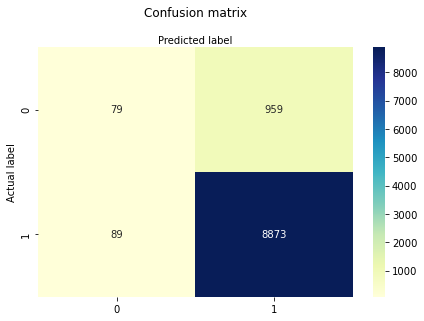

In [28]:
#Visualizing Confusion Matrix using Heatmap

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<span style=color:green><b>K-nearest neighbors (KNN)</span>

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
model_knn = knn.fit(X_train, y_train)

# Prediction
y_pred_knn = model_knn.predict(X_test)

In [30]:
print("Accuracy K-nearest:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy K-nearest: 0.8842


<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades..</span>

<span style=color:green><b>Accuracy</span>

In [31]:
print("Decision Tree_Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))
print("Logistic regression_Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("K-nearest_Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Decision Tree_Accuracy: 0.8566
Logistic regression_Accuracy: 0.8952
K-nearest_Accuracy: 0.8842


<span style=color:green><b>Confusion matrix</span>

In [ ]:
# Decision Tree
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
cnf_matrix

In [ ]:
# Logistic regression
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrix

In [ ]:
# K-nearest neighbors
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_matrix

<span style=color:green><b>Classification accuracy</span>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

In [ ]:
print(classification_report(y_test, y_pred_logreg))

In [ ]:
print(classification_report(y_test, y_pred_knn))

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Entrena’ls utilitzant els diferents paràmetres que admeten.</span>

<span style=color:green><b>Decision Tree tuning</span>

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use in rf model:\n')
pprint(dtc.get_params())

In [ ]:
param_grid = { 
    'max_depth': [2 , 4, 6, 8],
    'criterion': ['gini','entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5)
CV_dtc.fit(X_train, y_train)

In [ ]:
CV_dtc.best_params_

In [ ]:
dtc1 = DecisionTreeClassifier(criterion="gini", max_depth=4)
model_dtc1 = dtc1.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred_dtc1 = model_dtc1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc1))

<span style=color:green>*Accuracy is improved from 85.6% to 89.5% with decision tree model*<span>

<span style=color:green><b>LOGISTIC REGRESSION tuning </span>

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use in rf model:\n')
pprint(logreg.get_params())

In [ ]:
param_grid = { 
    'C': [0.01, 0.1, 1, 10, 100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

CV_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 5)
CV_logreg.fit(X_train, y_train)

In [ ]:
CV_logreg.best_params_

In [ ]:
logreg1 = LogisticRegression(C = 0.01)
model_logreg1 = logreg1.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred_logreg1 = model_logreg1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg1))

<span style=color:green>*Accuracy is very slightly improved from 89.5% to 89.6%*<span>

<span style=color:green><b>K-nearest neighbors tuning</span>

In [32]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use in rf model:\n')
pprint(knn.get_params())

Parameters currently in use in rf model:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [36]:
param_grid = { 
    'n_neighbors': [5, 7]
}

In [37]:
from sklearn.model_selection import GridSearchCV

CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
CV_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7]})

In [38]:
CV_knn.best_params_

{'n_neighbors': 7}

In [39]:
knn1 = KNeighborsClassifier(n_neighbors = 7)

model_knn1 = knn1.fit(X_train,y_train)

In [40]:
#Predict the response for test dataset
y_pred_knn1 = model_knn1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn1))

Accuracy: 0.8895


<span style=color:green>*Accuracy is improved from 88.4% to 88.9%*<span>

# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 5:</u>

<span style=color:blue>Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.<span>

<span style=color:green>We will additionaly encode 'Destination Airport' for prediction which was not included until now</span>

In [41]:
DF = pd.read_csv('DelayedFlightsCleaned.csv')
DF.shape

(1928371, 14)

In [42]:
DF = DF.sample(n=100000, random_state=1)
DF.shape

(100000, 14)

In [43]:
# In this sprint, we will predict Arrival Delay based numerical variables 'CRS Departure Time', 'CRS Arrival Time', 'Departure Delay','DayOfWeek' and categorical variables 'Uniquecarrier' and 'Departure Airport'.
DF.drop(['Date','Unnamed: 0','CRSElapsedTime','ActualElapsedTime','TaxiIn',
       'TaxiOut'], axis='columns', inplace=True)

In [44]:
DF['LateArr'] = np.where(DF['ArrDelay'] > 0, '1', '0')
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,UniqueCarrier,Origin,Dest,LateArr
942808,6,642,734,43.0,39.0,OO,TUS,LAX,1
1484347,1,1115,1185,1.0,9.0,MQ,MAF,DFW,1
1566787,6,975,1037,-1.0,9.0,US,CLT,ORD,0
1256237,2,1040,1160,57.0,28.0,DL,ATL,DCA,1
651063,5,1000,1037,8.0,13.0,EV,CVG,MEM,1


In [45]:
#X_train - Encoding categorical variables 'UniqueCarrier', 'Origin'

# Create dummy variables
dummy_UniqueCarrier_type = pd.get_dummies(DF['UniqueCarrier'], prefix='UniqueCarrier', drop_first=True)
dummy_Origin_type = pd.get_dummies(DF['Origin'], prefix='Origin', drop_first=True)
dummy_Dest_type = pd.get_dummies(DF['Dest'], prefix='Dest', drop_first=True)

# Drop unnecessary columns
to_drop = ['UniqueCarrier','Origin', 'Dest']
DF.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
DF = pd.concat([DF, dummy_UniqueCarrier_type, dummy_Origin_type, dummy_Dest_type], axis=1)
DF.shape

(100000, 612)

In [46]:
X, y = DF.drop(['LateArr','ArrDelay'],axis=1), DF.LateArr
print(X.shape, y.shape)

(100000, 610) (100000,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 610), (10000, 610), (90000,), (10000,))

In [49]:
from sklearn.preprocessing import StandardScaler

# Scale selected columns by index
# Set up scaler
scaler = StandardScaler().fit(X_train.iloc[:,:4])
X_train.iloc[:,:4] = scaler.transform(X_train.iloc[:,:4])
X_train.head()
#  Scale X_Test data
X_test.iloc[:,:4] = scaler.transform(X_test.iloc[:,:4])

In [50]:
X_train.head()

,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
288500,-0.991092,-0.935857,-1.017833,0.596940,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223838,-0.991092,0.952647,1.204786,-0.630251,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
340842,-0.490678,-1.569268,-1.579752,-0.099079,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502626,0.510150,0.503003,0.299274,-0.190660,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336769,0.009736,0.678950,0.496125,-0.099079,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style=color:green><b>DECISION TREE MODEL</span>

In [51]:
model_dtc = dtc.fit(X_train,y_train)
y_pred_dtc = model_dtc.predict(X_test)
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy Decision Tree: 0.8635


<span style=color:green>*Additional variable 'Airport Destination' improves accuracy. For on decision tree model, accuray improves from 85.6% to 86.3%*<span>

# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 6:</u>

<span style=color:blue>No utilitzis la variable DepDelay a l’hora de fer prediccions.<span>


In [59]:
DF.head()

,DayOfWeek,CRSDepTime,CRSArrTime,ArrDelay,DepDelay,LateArr,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
942808,6,642,734,43.0,39.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484347,1,1115,1185,1.0,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1566787,6,975,1037,-1.0,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256237,2,1040,1160,57.0,28.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651063,5,1000,1037,8.0,13.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X, y = DF.drop(['DepDelay','ArrDelay','LateArr'],axis=1), DF.LateArr
print(X.shape, y.shape)

(100000, 609) (100000,)


In [61]:
X.head()

,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
942808,6,642,734,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1484347,1,1115,1185,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1566787,6,975,1037,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256237,2,1040,1160,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
651063,5,1000,1037,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 609), (10000, 609), (90000,), (10000,))

In [64]:
from sklearn.preprocessing import StandardScaler

# Scale selected columns by index
# Set up scaler
scaler = StandardScaler().fit(X_train.iloc[:,:3])
X_train.iloc[:,:3] = scaler.transform(X_train.iloc[:,:3])
X_train.head()
#  Scale X_Test data
X_test.iloc[:,:3] = scaler.transform(X_test.iloc[:,:3])

In [65]:
X_train.head()

,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
288500,-0.991092,-0.935857,-1.017833,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223838,-0.991092,0.952647,1.204786,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
340842,-0.490678,-1.569268,-1.579752,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502626,0.510150,0.503003,0.299274,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336769,0.009736,0.678950,0.496125,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style=color:green><b>DECISION TREE MODEL</span>

In [66]:
model_dtc = dtc.fit(X_train,y_train)
y_pred_dtc = model_dtc.predict(X_test)
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy Decision Tree: 0.818


<span style=color:green>*Accuracy drops but still remains good since categorical variables 'airport'and 'carrier' have big impact on Arrival delay*<span>